In [28]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
import os
from glob import glob
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

%matplotlib inline

In [30]:
path = '/content/drive/MyDrive/data/programmers_ai/mlops/COVID_19_XRAY/'

In [31]:
print(f'훈련 데이터 개수: {len(glob(os.path.join(path, "train/*/*")))}')
print(f'테스트 데이터 개수: {len(glob(os.path.join(path,"test/*")))}')

훈련 데이터 개수: 2000
테스트 데이터 개수: 400


In [32]:
import shutil

In [33]:
labels = pd.read_csv("/content/drive/MyDrive/data/programmers_ai/mlops/COVID_19_XRAY/labels.csv")
labels.head()

,filename,label
0,image_001.png,covid
1,image_002.png,covid
2,image_003.png,normal
3,image_004.png,normal
4,image_005.png,normal


In [34]:
x_train, x_valid, y_train, y_valid = train_test_split(labels['filename'], labels['label'], test_size=0.2, shuffle=True, stratify=labels['label'], random_state=34)

In [35]:
x_valid = list(x_valid)

In [36]:
# for i, row in labels[5:].iterrows():
#   filename = row.filename
#   label = row.label
#   to = os.path.join(path, f'train/{label}/')
#   shutil.move(os.path.join(path,f'train/{filename}'), to)  

In [38]:
for i, row in labels[5:].iterrows():
  filename = row.filename
  label = row.label
  to = os.path.join(path, f'val/{label}/')
  if filename in x_valid:
    shutil.move(os.path.join(path, f'train/{label}/{filename}'), to)

In [40]:
print(f'훈련 데이터 개수: {len(glob(os.path.join(path, "train/*/*")))}')
print(f'검증 데이터 개수: {len(glob(os.path.join(path, "val/*/*")))}')

훈련 데이터 개수: 1602
검증 데이터 개수: 398


In [41]:
all_normal_imgs = []
all_covid_imgs = []

data_cat_path = os.path.join(path, 'train/')
normal_imgs = glob(data_cat_path + 'normal/*')
covid_imgs = glob(data_cat_path + 'covid/*')

all_normal_imgs.extend(normal_imgs)
all_covid_imgs.extend(covid_imgs)

print(f'정상 흉부 이미지 개수: {len(all_normal_imgs)}')
print(f'코로나 이미지 개수: {len(all_covid_imgs)}')

정상 흉부 이미지 개수: 800
코로나 이미지 개수: 802


## 타깃값 분포

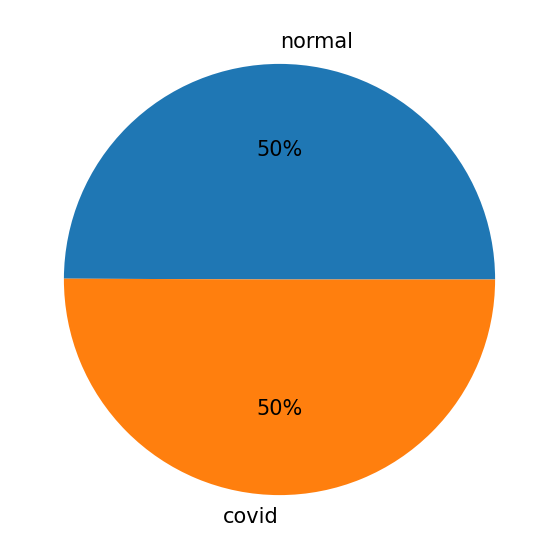

In [42]:
mpl.rc('font', size=15)
plt.figure(figsize=(7, 7))
label = ['normal', 'covid']

plt.pie([len(all_normal_imgs), len(all_covid_imgs)], labels=label, autopct='%.lf%%');

## 이미지 출력

In [43]:
import cv2
import matplotlib.gridspec as gridspec

In [44]:
def show_img(img_paths, rows=2, cols=3):
  assert len(img_paths) <= rows * cols

  mpl.rc('font', size=8)
  plt.figure(figsize=(15, 8))
  grid = gridspec.GridSpec(rows, cols)

  for idx, img_path in enumerate(img_paths):
    image = cv2.imread(img_path)
    ax = plt.subplot(grid[idx])
    ax.imshow(image)

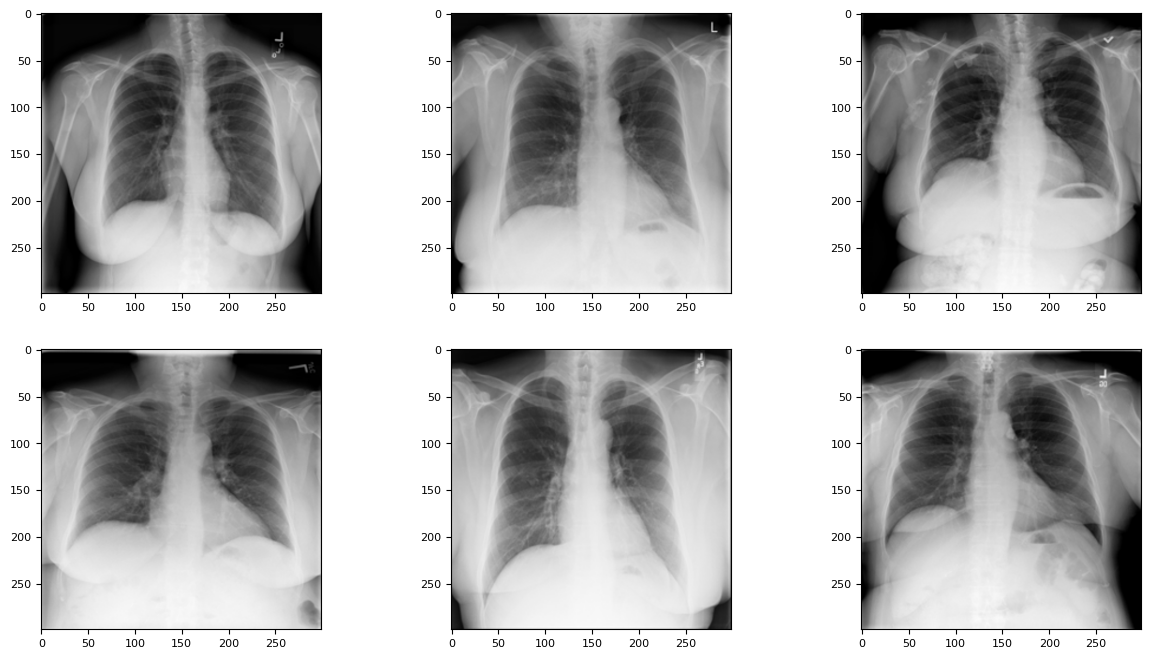

In [45]:
# 정상 엑스선 이미지 경로(마지막 6장)
num_of_imgs = 6
normal_img_paths = all_normal_imgs[-num_of_imgs:]

show_img(normal_img_paths)

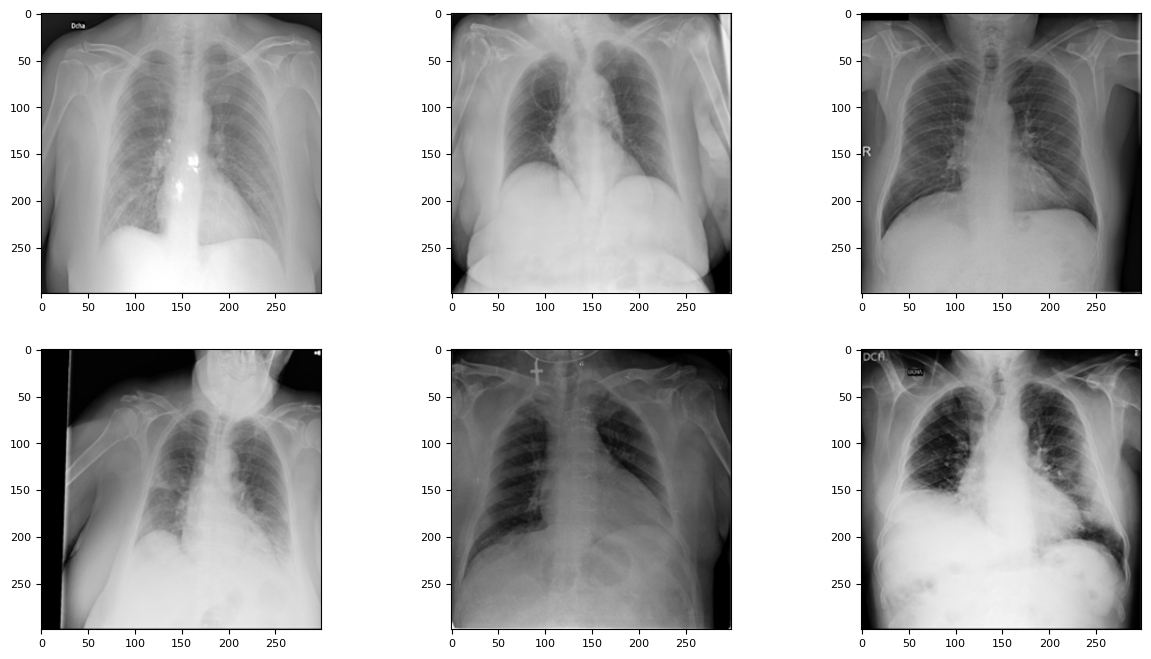

In [46]:
# 코로나 엑스선 이미지
covid_img_paths = all_covid_imgs[-num_of_imgs:]

show_img(covid_img_paths)

In [47]:
labels.head(50)

,filename,label
0,image_001.png,covid
1,image_002.png,covid
2,image_003.png,normal
3,image_004.png,normal
4,image_005.png,normal
5,image_006.png,normal
6,image_007.png,normal
7,image_008.png,covid
8,image_009.png,covid
9,image_010.png,covid
